<a href="https://colab.research.google.com/github/khushalbisani/dog-vs-cat/blob/master/dog_vs_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.layers import Activation, Dense, Dropout, Conv2D, Flatten, MaxPooling2D ,GlobalAveragePooling2D
from keras.models import Sequential
import random
import os
import  IPython.display as ipd
import cv2
from PIL import Image
%matplotlib inline

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
! free -m

              total        used        free      shared  buff/cache   available
Mem:          13022         523       10363           0        2135       12226
Swap:             0           0           0


In [4]:
!ls "/content/drive/My Drive"

'Colab Notebooks'   khushal.jpg			 'Untitled document (3).gdoc'
 Datasets	    signature.jpg		 'Untitled document.gdoc'
'jii wedding'	   'Untitled document (1).gdoc'
 KHUSHAL	   'Untitled document (2).gdoc'


In [0]:
os.chdir("/content/drive/My Drive/Datasets/dogvscat")

# !unzip dogs-vs-cats.zip

In [0]:
# !unzip train.zip
# !unzip test1.zip

In [7]:
path = "/content/drive/My Drive/Datasets/dogvscat/"
sam_sub = pd.read_csv(path + "sampleSubmission.csv")
sam_sub.head()

,id,label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [8]:
!ls "/content/drive/My Drive/Datasets/dogvscat"

dog_cat_model1.h5	   dogs-vs-cats.zip	 np_array_train_y.npy
dog_cat_model.h5	   np_array_test_x.npy	 sampleSubmission.csv
dog_cat_model_weights1.h5  np_array_test_y.npy	 test1.zip
dog_cat_model_weights.h5   np_array_train_x.npy  train.zip


In [0]:
# def extract_name(file):
#   x = file.split(".")[0]
#   if str(x) == str("cat"):
#     return [1,0]
#   else:
#     return [0,1]
  

In [0]:
# feature_data = []
# for j,file in enumerate(os.listdir(path+"train")):
#   #print(j)
#   img=Image.open(path+"train/"+file)
#   img = img.resize((128,128))  
#   ar=np.array(img)
#   feature_data.append((ar,extract_name(file)))
#   #print(feature_data[j])
#   if j%1000==0:
#     print(j)

In [0]:
# fdata = feature_data
# random.shuffle(fdata)

# train = fdata[:20000]
# test = fdata[20000:]

# train_x , train_y = zip(*train)
# test_x , test_y = zip(*test)

# train_x = np.array(train_x)
# train_y = np.array(train_y)

# test_x = np.array(test_x)
# test_y = np.array(test_y)

In [0]:
# print(train_x.shape)
# print(train_y.shape)
# print(test_x.shape)
# print(test_y.shape)

In [0]:
# np.save(path+'np_array_train_x.npy', train_x)
# np.save(path+'np_array_train_y.npy', train_y)
# np.save(path+'np_array_test_x.npy', test_x)
# np.save(path+'np_array_test_y.npy', test_y) 

In [0]:
train_x = np.load(path+'np_array_train_x.npy')
train_y = np.load(path+'np_array_train_y.npy')
test_x = np.load(path+'np_array_test_x.npy')
test_y = np.load(path+'np_array_test_y.npy') 

In [14]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(20000, 128, 128, 3)
(20000, 2)
(5000, 128, 128, 3)
(5000, 2)


In [15]:
from keras.models import Sequential
from keras.layers import Dense , MaxPool2D , Conv2D , Flatten , Dropout ,Activation

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,3)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))

W0810 15:39:51.402467 140614306064256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0810 15:39:51.437452 140614306064256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0810 15:39:51.443647 140614306064256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0810 15:39:51.482708 140614306064256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0810 15:39:51.486589 140614306064256 deprecation_wrapp

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 32)      25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
__________

In [0]:
from keras.optimizers import RMSprop
from keras.optimizers import Adam,SGD
optimizer = SGD(lr=0.01, momentum=0.9,nesterov=True)

In [0]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_lr=0.0001)

In [19]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

W0810 15:39:51.664369 140614306064256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0810 15:39:51.678869 140614306064256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
epoch = 20
batch_size = 100

nb_train_sample = int(train_x.shape[0])
nb_validation_sample = int(test_x.shape[0])

train_steps = nb_train_sample // batch_size
validation_steps = nb_validation_sample // batch_size

In [21]:
print(nb_train_sample)
print(nb_validation_sample)
print(train_steps)
print(validation_steps)

20000
5000
200
50


In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255,
                                       shear_range = 0.2,
                                       zoom_range = 0.2,
                                       horizontal_flip = True)

In [0]:
train_generator = train_datagen.flow(train_x,train_y , batch_size = batch_size)
validation_generator = validation_datagen.flow(test_x,test_y,batch_size = batch_size)

In [24]:
print(len(train_generator))
print(len(validation_generator))

200
50


In [25]:
history = model.fit_generator(train_generator , 
                             steps_per_epoch = train_steps,
                             epochs = epoch,
                             validation_data = validation_generator,
                             validation_steps = validation_steps,
                             callbacks = [learning_rate_reduction]
                             )

W0810 15:39:54.532181 140614306064256 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
200/200 [==============================] - 91s 454ms/step - loss: 0.6852 - acc: 0.5527 - val_loss: 0.6769 - val_acc: 0.5660
Epoch 2/20
200/200 [==============================] - 80s 398ms/step - loss: 0.6567 - acc: 0.6103 - val_loss: 0.6424 - val_acc: 0.6304
Epoch 3/20
200/200 [==============================] - 79s 393ms/step - loss: 0.6002 - acc: 0.6748 - val_loss: 0.5676 - val_acc: 0.7080
Epoch 4/20
200/200 [==============================] - 78s 392ms/step - loss: 0.5587 - acc: 0.7101 - val_loss: 0.5393 - val_acc: 0.7272
Epoch 5/20
200/200 [==============================] - 78s 392ms/step - loss: 0.5321 - acc: 0.7310 - val_loss: 0.5290 - val_acc: 0.7360
Epoch 6/20
200/200 [==============================] - 79s 393ms/step - loss: 0.5060 - acc: 0.7470 - val_loss: 0.4875 - val_acc: 0.7676
Epoch 7/20
200/200 [==============================] - 78s 392ms/step - loss: 0.4763 - acc: 0.7711 - val_loss: 0.4445 - val_acc: 0.7966
Epoch 8/20
200/200 [==============================] - 7

In [26]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


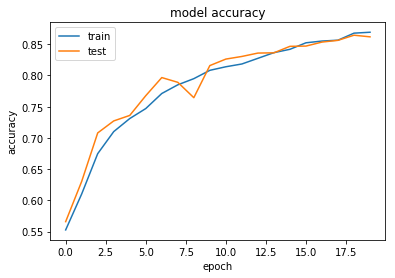

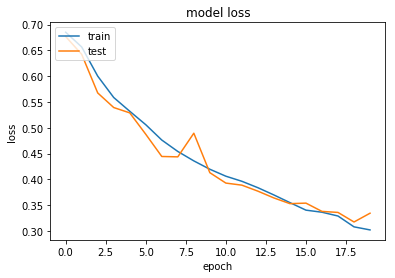

In [27]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
model.evaluate_generator(train_generator,train_steps)

[0.26946596428751945, 0.885950001180172]

In [29]:
model.evaluate_generator(validation_generator,validation_steps)

[0.33664214104413986, 0.8570000004768371]

In [30]:
model.evaluate(test_x,test_y)

5000/5000 [==============================] - 3s 622us/step


[3.0942885246276854, 0.801]

In [0]:
model.save_weights(path+"dog_cat_model_weights.h5")
model.save(path+'dog_cat_model.h5')

Load saved previous model as new model

In [0]:
from keras.models import load_model
new_model = load_model(path + "dog_cat_model.h5")

In [33]:
history = new_model.fit_generator(train_generator , 
                             steps_per_epoch = train_steps,
                             epochs = epoch,
                             validation_data = validation_generator,
                             validation_steps = validation_steps,
                             callbacks = [learning_rate_reduction]
                             )

Epoch 1/20
200/200 [==============================] - 82s 410ms/step - loss: 0.2909 - acc: 0.8765 - val_loss: 0.3429 - val_acc: 0.8578
Epoch 2/20
200/200 [==============================] - 78s 390ms/step - loss: 0.2777 - acc: 0.8807 - val_loss: 0.3291 - val_acc: 0.8682
Epoch 3/20
200/200 [==============================] - 78s 391ms/step - loss: 0.2711 - acc: 0.8838 - val_loss: 0.3204 - val_acc: 0.8636
Epoch 4/20
200/200 [==============================] - 78s 391ms/step - loss: 0.2608 - acc: 0.8895 - val_loss: 0.3246 - val_acc: 0.8688
Epoch 5/20
200/200 [==============================] - 78s 392ms/step - loss: 0.2588 - acc: 0.8934 - val_loss: 0.2963 - val_acc: 0.8796
Epoch 6/20
200/200 [==============================] - 78s 391ms/step - loss: 0.2422 - acc: 0.8988 - val_loss: 0.3504 - val_acc: 0.8618
Epoch 7/20
200/200 [==============================] - 78s 390ms/step - loss: 0.2386 - acc: 0.8997 - val_loss: 0.3101 - val_acc: 0.8758
Epoch 8/20
200/200 [==============================] - 7

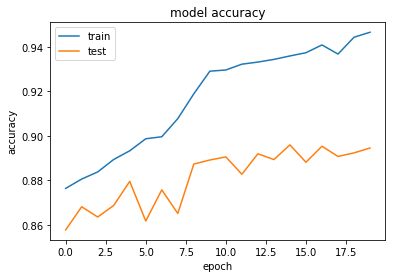

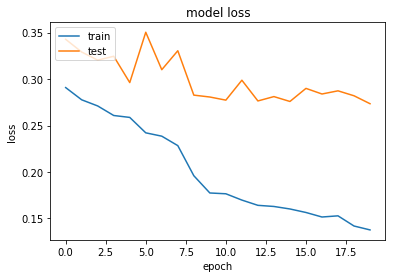

In [34]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
new_model.evaluate_generator(train_generator,train_steps)

[0.0944520560465753, 0.9675000065565109]

In [36]:
new_model.evaluate_generator(validation_generator,validation_steps)

[0.2776246535778046, 0.8988000047206879]

In [37]:
new_model.evaluate(test_x,test_y)

5000/5000 [==============================] - 3s 542us/step


[2.967984482192993, 0.8122]

In [0]:
# model.save_weights(path+"dog_cat_model_weights1.h5")
# model.save(path+'dog_cat_model1.h5')

Applying Transfer learning (VGG16 model)

In [39]:
from keras.applications.vgg16 import VGG16

model_vgg16 = VGG16(weights='imagenet', include_top=False,input_shape=(128,128,3))

#Adding custom Layers 
x = model_vgg16.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(2, activation="softmax")(x)

58892288/58889256 [==============================] - 4s 0us/step


In [40]:
from keras.models import Sequential, Model

model_final = Model(input = model_vgg16.input , output = predictions)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
model_final.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0         
__________

In [0]:
optim = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [0]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_lr=0.00001)

In [0]:

epochs = 10
batch_size = 100

nb_train_samples=int(train_x.shape[0])
nb_validation_samples=int(test_x.shape[0])

steps_per_epoch=nb_train_samples // batch_size
validation_steps=nb_validation_samples // batch_size

In [46]:
print(nb_train_samples)
print(nb_validation_samples)
print(steps_per_epoch)
print(validation_steps)

20000
5000
200
50


In [0]:
model_final.compile(optimizer = optim , loss = "categorical_crossentropy", metrics=["accuracy"])

In [48]:
history=model_final.fit_generator(
    train_generator, 
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[learning_rate_reduction]
)

Epoch 1/10
200/200 [==============================] - 114s 569ms/step - loss: 0.7377 - acc: 0.4976 - val_loss: 0.6933 - val_acc: 0.4982
Epoch 2/10
200/200 [==============================] - 101s 503ms/step - loss: 0.6932 - acc: 0.4966 - val_loss: 0.6931 - val_acc: 0.5028
Epoch 3/10
200/200 [==============================] - 101s 504ms/step - loss: 0.6932 - acc: 0.5027 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 4/10
200/200 [==============================] - 100s 502ms/step - loss: 0.6933 - acc: 0.4966 - val_loss: 0.6932 - val_acc: 0.4978
Epoch 5/10
200/200 [==============================] - 100s 502ms/step - loss: 0.6932 - acc: 0.5039 - val_loss: 0.6932 - val_acc: 0.4968
Epoch 6/10
200/200 [==============================] - 101s 503ms/step - loss: 0.6933 - acc: 0.4952 - val_loss: 0.6932 - val_acc: 0.4980

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Epoch 7/10
200/200 [==============================] - 101s 503ms/step - loss: 0.6932 - acc: 0.4929 - v

In [0]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [50]:
new_model.evaluate_generator(train_generator,train_steps)

[0.09308100691065192, 0.968500007390976]

In [51]:
new_model.evaluate_generator(validation_generator,validation_steps)

[0.26256233632564546, 0.8999999988079072]

In [52]:
new_model.evaluate(test_x,test_y)

5000/5000 [==============================] - 3s 526us/step


[2.967984482192993, 0.8122]